# GRIP @ The Sparks Foundation
# Name: Eriny Adel Badr Louis
# Batch: JUNE 2022

# TASK-2 Predection using Unsupervised ML
####  (Level - Beginner)

*   Predict the optimum number of clusters and represent it visually.

In [218]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### Getting Iris data

Reading the data from csv file

In [219]:
data = pd.read_csv('Iris.csv')
#OR
#data = pd.read_csv('http://bit.ly/w-data')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Plotting the data

No handles with labels found to put in legend.


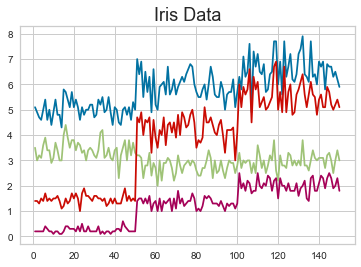

In [220]:
plt.plot(data.Id, data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

plt.title('Iris Data', size=18)
plt.legend()
plt.show()

### Preprocessing

In [221]:
X = data.drop(labels=['Id','Species'],axis=1)

In [222]:
X.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Plotting selected features

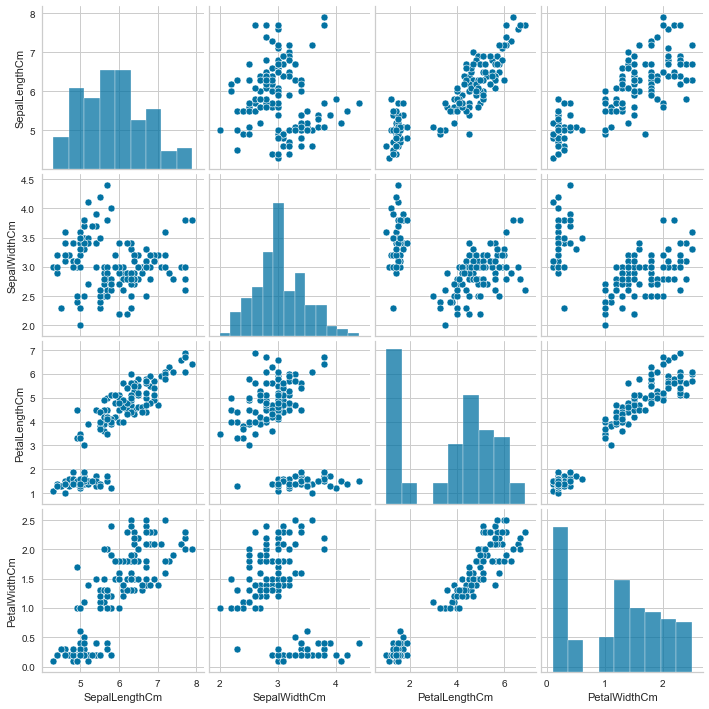

In [223]:
sns.pairplot(data=X)

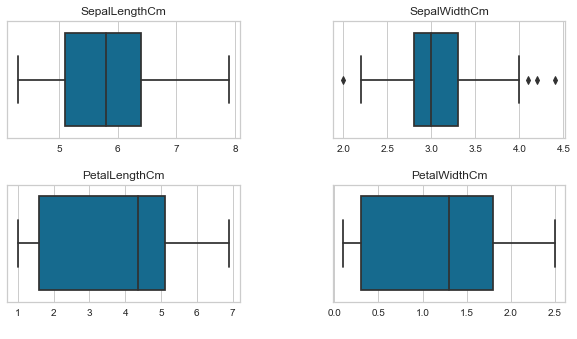

In [224]:
plt.figure(figsize=(10,5))

for i in range(len(X.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=X , x=X.columns[i])
    plt.title(X.columns[i])
    plt.xlabel(" ")

plt.subplots_adjust(bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

### Finding the optimal number of clusters for this data

In [225]:
## Manually
def GettingOptimalNumOfClusters():
    SumSquares = [] # The sum of squares of the distances of each data point in all clusters to their respective centroids

    for k in range(1, 11):
        kMeansModel = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kMeansModel.fit(X)
        SumSquares.append(kMeansModel.inertia_)

    return SumSquares

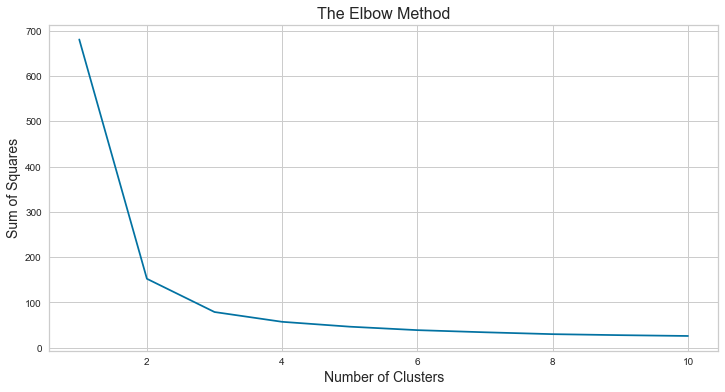

In [226]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), GettingOptimalNumOfClusters(), 'bx-')
plt.title('The Elbow Method', size=16)
plt.xlabel('Number of Clusters', size=14)
plt.ylabel('Sum of Squares', size=14)
plt.show()

Metrics:
* 'distortion'       : Computes the sum of squared distances from each point to its assigned center.
* 'silhouette'       : Calculates the mean Silhouette Coefficient of all samples
* 'calinski_harabasz': Computes the ratio of dispersion between and within clusters.

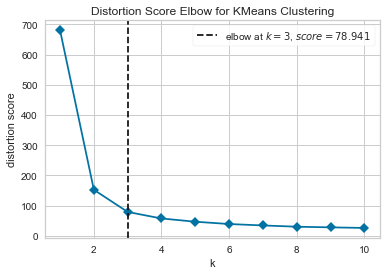

In [227]:
## Automatically
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1, 11), matric='silhouette', timings=False, locate_elbow=True).fit(X)

visualizer.show()

In [228]:
optimalNoOfClusters = 3
KMeansModel = KMeans(n_clusters=optimalNoOfClusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
predictions = KMeansModel.fit_predict(X)

In [229]:
labels = data.Species.unique()

X = np.array(X)

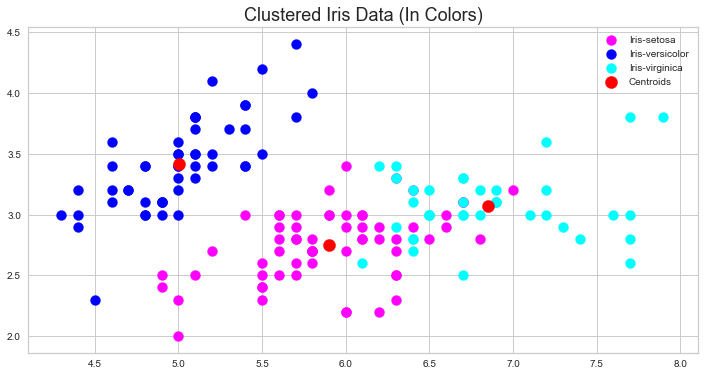

In [230]:
plt.figure(figsize=(12,6))

plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s=100, c='magenta', label=labels[0])
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s=100, c='blue', label=labels[1])
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s=100, c='cyan', label=labels[2])

plt.scatter(KMeansModel.cluster_centers_[:, 0], KMeansModel.cluster_centers_[:,1], s=150, c='red', label='Centroids')

plt.title('Clustered Iris Data (In Colors)', size=18)
plt.legend()
plt.show()